In [42]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from opendata import OpenData
import pandas as pd
from plotly.offline import iplot, init_notebook_mode
from plotly import graph_objs as go
from matplotlib import pyplot as plt
import maya
from scipy.optimize import curve_fit
import numpy as np
from stravaio import StravaIO
import glob
import os
import json
from pprint import pprint

init_notebook_mode(connected=True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
def robust_max(window):
    """Calculate max of the window while omitting outer fence values"""
    median = window.quantile(0.5)
    q25 = window.quantile(0.25)
    q75 = window.quantile(0.75)
    iqr = q75 - q25
    window[(window>median+1.5*iqr)|(window<median-1.5*iqr)] = np.nan
    return window.max()

In [3]:
CP_COLS = ['1m_critical_power', '2m_critical_power', '3m_critical_power', '5m_critical_power', '8m_critical_power',
              '10m_critical_power', '20m_critical_power']
CP_COLS_ROLLING = [s + '_rolling' for s in CP_COLS]

def cp_fit(row):
    def func(x, cp, w):
        return cp + w/x
    ydata = row.values[~np.isnan(row.values)]
    xdata = np.array([1, 2, 3, 5, 8, 10, 20])[~np.isnan(row.values)]
    try:
        popt, pcov = curve_fit(func, xdata, ydata, p0=[ydata[-1], 20000/60])
    except:
        return np.nan
    return popt[0]

# Get athlete from strava

In [26]:
client = StravaIO('9761bb5329f2c0d7592d108015d9c7358d3abc9d')

In [36]:
athlete = client.get_logged_in_athlete()

In [38]:
activities = client.get_logged_in_athlete_activities(after='20180101')

Fetched 30, the latests is on 2018-08-16 03:39:53+00:00
Fetched 30, the latests is on 2018-10-29 20:18:28+00:00
Fetched 30, the latests is on 2018-11-30 20:54:08+00:00
Fetched 25, the latests is on 2018-12-29 06:22:04+00:00


In [41]:
for a in activities:
    print(f"{a.id}: {a.name}")
    _a = client.get_activity_by_id(a.id)
    _a.store_locally()

1354978421: Afternoon Ride
1436034751: Afternoon Ride
1445676900: Afternoon Ride
1447877132: Afternoon Ride
1469434720: Afternoon Ride
1471289503: Afternoon Ride
1481685472: Afternoon Ride
1629609726: Rondje fahren ;)
1658953178: Thalersee
1690446033: Morning Ride
1692526125: Morning Ride
1699068344: Morning Ride
1700961625: Morning Ride
1704496066: Afternoon Ride
1710068965: Morning Ride
1712379054: Morning Ride
1719176509: Morning Ride
1723683341: Morning Ride
1726092159: Across Graz in cycling shoes
1728381224: Breakfast Schockl
1733625446: Afternoon Ride
1737119376: Morning Ride
1741637834: Morning Ride
1744094717: Morning Ride
1749446659: Afternoon Ride
1753156801: Morning Schöckl
1755187884: Morning Ride
1759819159: Morning Ride
1770684353: Morning Ride
1775483146: Morning Ride
1777638190: Morning Ride
1780915713: Afternoon Ride
1786656508: Morning Ride
1789064254: Morning Ride
1794489937: Morning Ride
1806775936: Morning Ride
1820266177: Morning Ride
1822591322: Morning Ride
183

In [46]:
athlete.api_response.id

1202065

In [48]:
dir_activities = os.path.join(dir_stravadata(), f"activities_1202065")
glob.glob(os.path.join(dir_activities, '*.json'))

['/Users/sladkovm/.stravadata/activities_1202065/activity_1354978421.json',
 '/Users/sladkovm/.stravadata/activities_1202065/activity_1436034751.json',
 '/Users/sladkovm/.stravadata/activities_1202065/activity_1445676900.json',
 '/Users/sladkovm/.stravadata/activities_1202065/activity_1447877132.json',
 '/Users/sladkovm/.stravadata/activities_1202065/activity_1469434720.json',
 '/Users/sladkovm/.stravadata/activities_1202065/activity_1471289503.json',
 '/Users/sladkovm/.stravadata/activities_1202065/activity_1481685472.json',
 '/Users/sladkovm/.stravadata/activities_1202065/activity_1629609726.json',
 '/Users/sladkovm/.stravadata/activities_1202065/activity_1658953178.json',
 '/Users/sladkovm/.stravadata/activities_1202065/activity_1690446033.json',
 '/Users/sladkovm/.stravadata/activities_1202065/activity_1692526125.json',
 '/Users/sladkovm/.stravadata/activities_1202065/activity_1699068344.json',
 '/Users/sladkovm/.stravadata/activities_1202065/activity_1700961625.json',
 '/Users/sla

In [16]:
a = client.get_activity_by_id(1481685472)

In [17]:
a.to_dict()

{'id': 1481685472,
 'external_id': 'garmin_push_2591340626',
 'upload_id': 1596455442,
 'athlete': {'id': 1202065},
 'name': 'Afternoon Ride',
 'distance': 33014.3,
 'moving_time': 5218,
 'elapsed_time': 5363,
 'total_elevation_gain': 192.0,
 'elev_high': 21.4,
 'elev_low': -26.2,
 'type': 'Ride',
 'start_date': '2018-03-31T12:36:39Z',
 'start_date_local': '2018-03-31T14:36:39Z',
 'timezone': '(GMT+01:00) Europe/Brussels',
 'start_latlng': [50.79, 4.32],
 'end_latlng': [50.79, 4.32],
 'achievement_count': 3,
 'kudos_count': 33,
 'comment_count': 0,
 'athlete_count': 1,
 'photo_count': 0,
 'total_photo_count': 0,
 'map': {'id': 'a1481685472',
  'polyline': 'uc_uH_}jYCLKH}AF_ALs@B_ATcA^ETBZAJO\\QNk@Nk@VeBpAgEjFOLc@NEn@Kh@KLQHGNCTFv@ZtB^tBzBbK\\rAfHb[^hB\\hC@LE`@JnAFpA?v@N|@GpEDbBMlCE`C[fKEXEHGDOCQMo@m@aAyAmAkAUKc@q@IWGEG@@\\ApA]tKI\\y@nAaAnCA?EA[UIDKPG^@b@FNLP@DY~@y@vBg@bA[^WHeAHeAAWA]BEDE\\GpB@LDJFFTFfQhCdNfB~Ab@nAd@hDtB@H?J_@jBEJGFIBKAa@Mk@_@IAK@[ZuCzEyHjNgAhCs@zAaB~BWf@[~@Qr@cBdIEJIEC

In [30]:
for a in client.local_activities(1202065):
    print(a['id'])
    stream = client.get_activity_streams(a['id'], 1202065)
    stream.store_locally()

1354978421
1436034751
1445676900
1447877132
1469434720
1471289503
1481685472
1629609726
1658953178
1690446033
1692526125
1699068344
1700961625
1704496066
1710068965
1712379054
1719176509
1723683341
1726092159
1728381224
1733625446
1737119376
1741637834
1744094717
1749446659
1753156801
1755187884
1759819159
1770684353
1775483146
1777638190
1780915713
1786656508
1789064254
1794489937
1806775936
1820266177
1822591322
1830150572
1833686103
1838170525
1843248234
1846036048
1853558786
1855614901
1861083433
1866244362
1873364544
1891286727
1893247061
1897493098
1904480944
1916596329
1918937140
1921924570
1925865610
1928518883
1932464775
1933115683
1934611002
1935142767
1936461596
1937054978
1939764884
1941879842
1945966783
1946467608
1948209349
1948985322
1950038161
1950950659
1953773651
1956829400
1959003004
1959599137
1961209237
1972731472
1975896097
1975896101
1982820405
1982879204
1985012000
1987136900
1987238486
1988151827
1988188917
1990000646
1990072613
1992145063
1993231391
1995064056

In [36]:
streams = client.local_streams(1202065)

In [37]:
s = next(streams)

In [38]:
s.head()

,time,distance,altitude,velocity_smooth,heartrate,cadence,watts,temp,moving,grade_smooth,lat,lng
0,0,0.0,-43.4,0.0,78,56,0,12,False,0.0,50.791234,4.320897
1,1,0.0,-43.4,0.0,78,56,0,12,False,0.0,50.791234,4.320897
2,2,0.0,-43.4,0.0,77,56,0,12,False,0.0,50.791234,4.320897
3,3,0.0,-43.4,0.0,77,56,0,12,False,0.0,50.791234,4.320897
4,4,0.0,-43.4,0.0,76,56,0,12,False,0.0,50.791234,4.320897


In [44]:
s = client.get_activity_streams(2041327454, 1202065)

In [45]:
s.head()

,time,velocity_smooth,moving,grade_smooth
0,0,0.0,True,0.0
1,1,0.0,True,0.0
2,2,0.0,True,0.0
3,3,0.0,True,0.0
4,4,0.0,True,0.0


# List all local athletes (open data)

In [2]:
od = OpenData()

In [308]:
atl = od.local_athletes()

In [309]:
a = next(atl)

In [313]:
a.metadata['RIDES']['2017/01/31 17:36:44 UTC']['METRICS'].keys()

dict_keys(['a_skiba_xpower', 'a_skiba_relative_intensity', 'a_skiba_bike_score', 'a_skiba_variability_index', 'a_skiba_response_index', 'a_coggan_np', 'a_coggan_if', 'a_coggan_tss', 'a_coggam_variability_index', 'a_friel_efficiency_factor', 'a_coggan_tssperhour', 'aerobic_decoupling', 'ride_count', 'workout_time', 'time_riding', 'athlete_weight', 'elevation_loss', 'total_work', 'average_power', 'average_apower', 'nonzero_power', 'average_hr', 'average_ct', 'heartbeats', 'hrpw', 'wb', 'ap_percent_max', 'hrnp', 'average_cad', 'average_temp', 'max_power', 'max_heartrate', 'min_heartrate', 'max_ct', 'max_cadence', 'max_temp', 'min_temp', 'ninety_five_percent_hr', 'eoa', 'meanpowervariance', 'maxpowervariance', 'average_lte', 'average_lps', 'total_kcalories', 'activity_crc', 'atiss_score', 'antiss_score', 'cp_setting', 'skiba_xpower', 'skiba_relative_intensity', 'skiba_bike_score', 'skiba_variability_index', 'tiss_delta', 'skiba_response_index', 'coggan_np', 'coggan_if', 'coggan_tss', 'cogg

In [311]:
df = pd.DataFrame({
    'power': a.metadata['RIDES']['2017/01/31 17:36:44 UTC']['METRICS']['power_mmp'],
    'time': a.metadata['RIDES']['2017/01/31 17:36:44 UTC']['METRICS']['power_mmp_secs'],
})

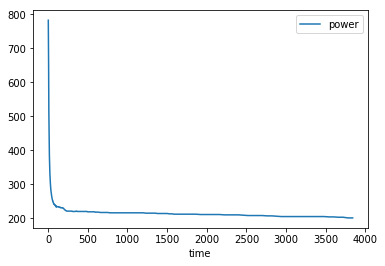

In [312]:
df.plot(x='time', y='power')

In [325]:
a.metadata['RIDES']['2017/01/31 17:36:44 UTC']['METRICS']['3m_critical_power']

'230.40000'

In [326]:
df[df.time==3*60]

,power,time
179,230,180


# Extract all bike rides and create a list of dict

In [96]:
rides = []
for a in atl:
    for k, v in a.metadata['RIDES'].items():
        if v['sport'] == 'Bike':
            _d = {
                'id': a.id,
                'date': maya.parse(v.get('date')).iso8601(),
                'workout_time': v['METRICS'].get('workout_time'),
                'coggan_if': v['METRICS'].get('coggan_if', [0, 0])[0],
                '1m_critical_power': v['METRICS'].get('1m_critical_power'),
                '2m_critical_power': v['METRICS'].get('2m_critical_power'),
                '3m_critical_power': v['METRICS'].get('3m_critical_power'),
                '5m_critical_power': v['METRICS'].get('5m_critical_power'),
                '8m_critical_power': v['METRICS'].get('8m_critical_power'),
                '10m_critical_power': v['METRICS'].get('10m_critical_power'),
                '20m_critical_power': v['METRICS'].get('20m_critical_power'),
                '30m_critical_power': v['METRICS'].get('30m_critical_power'),
                '60m_critical_power': v['METRICS'].get('60m_critical_power'),
                '20m_peak_wpk': v['METRICS'].get('20m_peak_wpk'),
                'cp_setting': v['METRICS'].get('cp_setting')
            }
            rides.append(_d)


# Create a dataframe of rides and perform data type conversion

In [134]:
df = pd.DataFrame(rides)
col_to_num = ['workout_time', '20m_peak_wpk', 'cp_setting', 'coggan_if',
              '1m_critical_power', '2m_critical_power', '3m_critical_power', '5m_critical_power', '8m_critical_power',
              '10m_critical_power', '20m_critical_power', '30m_critical_power', '60m_critical_power']
df[col_to_num] = df[col_to_num].astype('float')
df['date'] = pd.to_datetime(df['date'])
df = df.dropna().reset_index(drop=True)

# Filter data frame to dates above 2016

In [166]:
df = df[df['date']>maya.parse('2016').datetime(naive=True)]

In [190]:
athl_id = []
for _id in df.id.unique():
    _df = df[df.id == _id]
    _unq = _df['cp_setting'].unique()
    if len(_unq) > 10:
        athl_id.append(_id)
        print(f"id: {_id}, {_unq}")
athl_id

id: 06f81197-504a-478b-a347-052d4df03044, [205. 195. 212. 214. 220. 216. 223. 219. 209. 222. 201. 215. 210. 196.]
id: 14af4992-a4f3-45f7-9e24-de753af98c72, [290. 250. 260. 272. 276. 282. 298. 301. 285. 230. 240. 270. 255. 265.
 275.]
id: 1746288d-df53-4c13-a06a-978c7ae69318, [215. 245. 235. 240. 250. 255. 265. 270. 280. 275. 285.]
id: 18546aba-f368-4000-a131-a78c090038bc, [191. 205. 202. 219. 228. 237. 233. 263. 274. 260. 261.]
id: 1ff7eaf8-367a-4355-b69f-31572cc31612, [245. 218. 265. 270. 273. 249. 263. 255. 257. 268. 258. 267. 262. 260.
 250. 238. 240. 244. 247.]
id: 38ec277a-e5a4-483c-9d59-6af0ff6bccab, [265. 270. 280. 285. 295. 290. 283. 286. 260. 250. 275. 277.]
id: 3ca34ae7-17f4-4973-a6a3-bcf694e6307f, [274. 300. 316. 330. 313. 320. 310. 290. 280. 303. 319. 314. 288. 315.
 295. 285.]


['06f81197-504a-478b-a347-052d4df03044',
 '14af4992-a4f3-45f7-9e24-de753af98c72',
 '1746288d-df53-4c13-a06a-978c7ae69318',
 '18546aba-f368-4000-a131-a78c090038bc',
 '1ff7eaf8-367a-4355-b69f-31572cc31612',
 '38ec277a-e5a4-483c-9d59-6af0ff6bccab',
 '3ca34ae7-17f4-4973-a6a3-bcf694e6307f']

# For a given athlete calculate rolling CP key points

In [235]:
QNTL = 0.99
ROL = '42D'

# Estimate CP

In [283]:
def estimate_cp(df, _id):
    _df = df[df.id == _id]
    _df = _df.set_index('date', drop=False).sort_index()
    _df[CP_COLS_ROLLING] = _df[CP_COLS].rolling(ROL, min_periods=1, axis=0).apply(robust_max, raw=False)
    _df['cp'] = _df[CP_COLS_ROLLING].apply(cp_fit, axis=1)
    _df['cp_rolling'] = _df['cp'].rolling(ROL, min_periods=1, axis=0).max()
    return _df

# Plot data

In [306]:
def plot_data(_df):
    
    cp_rolling = go.Scatter({
        'name': '2d rolling 42D CP from fit',
        'x': _df['date'],
        'y': _df['cp_rolling'],
        'mode': 'markers',
        'marker': {
            'color': 'navy'
        }
    })

    cp_setting = go.Scatter({
        'name': 'Athlete CP settings',
        'x': _df['date'],
        'y': _df['cp_setting']
    })

    data = [cp_rolling, cp_setting]
    
    for col in ['1m_critical_power_rolling', '5m_critical_power_rolling', '20m_critical_power_rolling']:
        _trace = go.Scatter({
            'name': col,
            'x': _df['date'],
            'y': _df[col],
            'mode': 'markers'
        })
        data.append(_trace)
    
    return data

layout = go.Layout({
    "title":"Golden Cheetah Open Data: automatic CP determination",
    "legend": {
        "x": 0.05,
        "y": 1.1,
        "orientation": "h"
    },
    'yaxis': {'title': 'Power [Watts]'}
})


In [307]:
for _id in athl_id:
    _df = estimate_cp(df, _id)
    data = plot_data(_df)
    iplot(go.Figure(data, layout))

# Plot all CP values

In [299]:
_df = df[df['id']=='06f81197-504a-478b-a347-052d4df03044']
_df = _df.set_index('date', drop=False).sort_index()
_df[CP_COLS_ROLLING] = _df[CP_COLS].rolling('42D', min_periods=5).apply(robust_max, raw=False)

In [300]:
data = []
for col in CP_COLS_ROLLING:
    _trace = go.Scatter({
        'name': col,
        'x': _df['date'],
        'y': _df[col],
        'mode': 'markers'
    })
    data.append(_trace)
    
fig = go.Figure(data)
iplot(fig)